In [1]:
#  creating a autokeras model for training to model predict galcier & mountain 
# Importing basic Library
import os
import autokeras as ak
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [2]:
# Loading Dataset two lable glacier(2950 img) and Mountain(2950 img) images in this dataset
datadir = 'D:\\Images\\data1'

In [3]:
labels = [] # Image Categories

for category in os.listdir(datadir):
    labels.append(category)
print(labels)

['glacier', 'mountain']


In [4]:
# Store labels in json file
import json
data = {"flowers": labels}

with open('label_name.json', 'w') as jsonfile:
    json.dump(data, jsonfile)

In [5]:
# function Preprocessing of images
def preprocess(path):
    img_array = imread(path)
    img_resized = resize(img_array,(150,150,3))
    return img_resized

In [6]:
# Processing Image
target = []
images = []

for category in labels:
    path = os.path.join(datadir,category)
    class_num = labels.index(category)
    
    count = 0
    for img in os.listdir(path)[:2950]:
        img = preprocess(os.path.join(path,img))        
        images.append(img)
        target.append(class_num)
        
        count = count + 1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [7]:
print(len(target))
print(len(images))
# print(target)
# print(images)

5900
5900


In [8]:
# Convert data in numpy array
target = np.array(target)
images = np.array(images)

In [9]:
print(labels)
print(images.shape)
type(target.shape)

['glacier', 'mountain']
(5900, 150, 150, 3)


tuple

In [11]:
# spliting dataset
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,target,test_size=0.15, random_state=21)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train[:10])

(5015, 150, 150, 3)
(5015,)
(885, 150, 150, 3)
(885,)
[1 1 1 0 1 1 1 0 1 1]


In [13]:
ak.__version__

'1.0.12'

In [14]:
clf = ak.ImageClassifier(overwrite=True,max_trials=1)

In [15]:
clf.fit(x_train, y_train, epochs=10,verbose=1,batch_size=32)

Trial 1 Complete [00h 33m 17s]
val_loss: 0.35727766156196594

Best val_loss So Far: 0.35727766156196594
Total elapsed time: 00h 33m 17s
INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/10
157/157 [==============================] - 209s 1s/step - loss: 0.6564 - accuracy: 0.7799
Epoch 2/10
157/157 [==============================] - 240s 2s/step - loss: 0.3661 - accuracy: 0.8445
Epoch 3/10
157/157 [==============================] - 240s 2s/step - loss: 0.2754 - accuracy: 0.8917
Epoch 4/10
157/157 [===========

In [80]:
# predicting test data
ypred = clf.predict(x_test)
ypred

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],

In [81]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [82]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       436
           1       0.85      0.77      0.81       449

    accuracy                           0.81       885
   macro avg       0.82      0.81      0.81       885
weighted avg       0.82      0.81      0.81       885



In [83]:
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))

0.8135593220338984
[[375  61]
 [104 345]]


In [84]:
# Export model____________
model = clf.export_model()
model.save("model_autokeras.h5")

In [150]:
path = "D:\\Images\\data1\\pred"

In [151]:
out = []

count = 0
for img in os.listdir(path)[:15]:
    img = preprocess(os.path.join(path,img))        
    out.append(img)

    count = count + 1
    print(count,end=' ,')

1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,

In [152]:
out1 = np.array(out)

In [153]:
pred = clf.predict(out1)

In [154]:
int(pred[5][0])

0

0
Predicted Image is *** Glacier ***


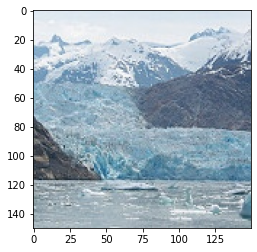



0
Predicted Image is *** Glacier ***


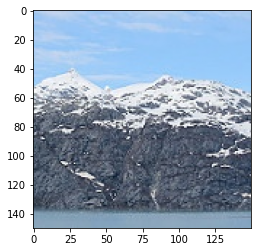



0
Predicted Image is *** Glacier ***


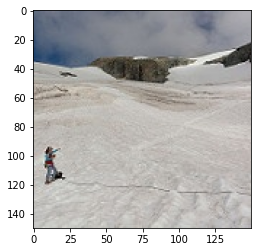



1
Predicted Image is *** Mountain ***


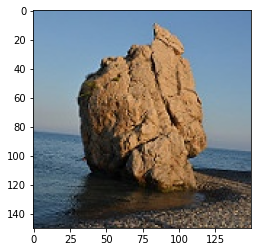



0
Predicted Image is *** Glacier ***


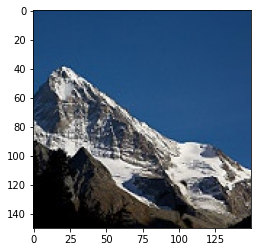



0
Predicted Image is *** Glacier ***


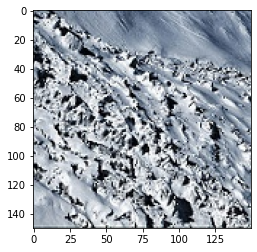



1
Predicted Image is *** Mountain ***


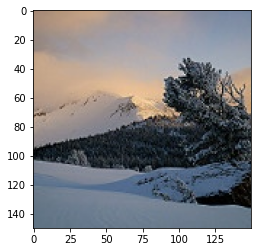



1
Predicted Image is *** Mountain ***


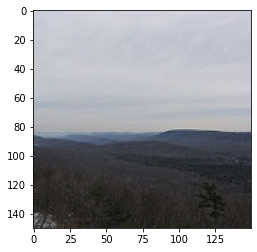



0
Predicted Image is *** Glacier ***


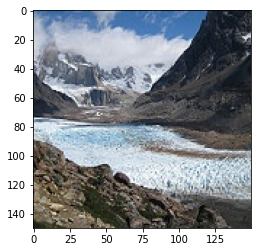



1
Predicted Image is *** Mountain ***


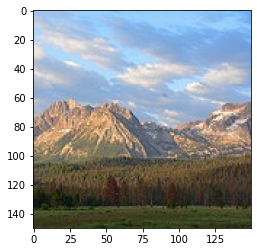



0
Predicted Image is *** Glacier ***


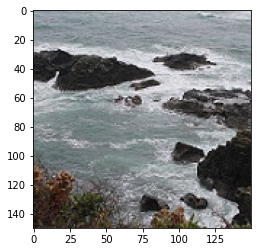



0
Predicted Image is *** Glacier ***


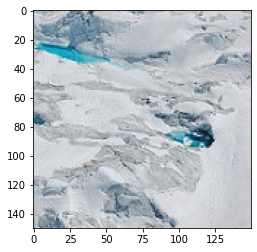



0
Predicted Image is *** Glacier ***


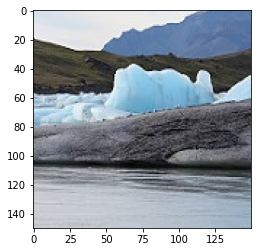



0
Predicted Image is *** Glacier ***


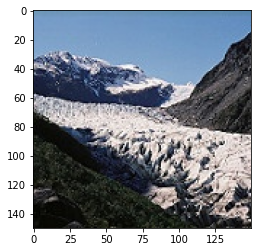

In [155]:
import matplotlib.pyplot as plt
for i in range(len(out1)):
    t = out[i]
    t1 = int(pred[i][0])
    
    if t1 == 0:
        print(t1)
        print("Predicted Image is *** Glacier ***")
        
        plt.imshow(t)
        plt.show()
        print()
        print()
        
    if t1 == 1:
        print(t1)
        print("Predicted Image is *** Mountain ***")    
        plt.imshow(t)
        plt.show()
        print()
        print()
    